![](Images/Hearing_me.jpg)

# Import modules

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf

## Read in data

In [88]:
df = pd.read_csv('https://osf.io/53ry4/download')

## Inspect the data

In [83]:
df.head(n=10)

,ChildID,Visit,ASD,Gender,Age,ADOS,MSEL_EL,MSEL_VR,ChildMLU,ChildTokens,ChildTypes,ParentMLU,ParentTokens,ParentTypes,SharedType
0,1,1,0,Male,19.80,0,14,28,1.337349,194,19,3.671821,2417,478,5
1,1,2,0,Male,23.93,0,14,28,1.009009,223,18,3.913793,2762,516,2
2,1,3,0,Male,27.70,0,14,28,1.570370,481,98,4.405063,3215,472,80
3,1,4,0,Male,32.90,0,14,28,2.047619,438,150,4.475936,2814,654,75
4,1,5,0,Male,35.90,0,14,28,3.000000,640,208,5.284615,3075,708,130
5,1,6,0,Male,40.13,0,14,28,2.652000,897,263,4.732484,3138,739,145
6,2,1,1,Male,28.80,13,27,34,2.048246,663,182,4.170984,1818,403,68
7,2,2,1,Male,33.17,13,27,34,3.329114,660,231,5.049470,1512,397,112
8,2,3,1,Male,37.07,13,27,34,2.930636,1321,330,4.211230,1819,428,125
9,2,4,1,Male,41.07,13,27,34,4.236111,733,228,5.396078,1540,395,128


## Look at Expressive Language vs. Visual Reception

The *Mullen Scales of Early Learning* measure cognitive and motor development in early childhood. This dataset includes data from two of the MSEL subscales: *Expressive Language* and *Visual Reception*. We might expect these two cognitive subscales to correlate with each other, but do they? We can use ``regplot()`` to visually inspect these data.

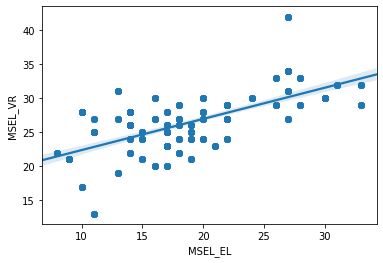

In [84]:
sns.regplot(x = "MSEL_EL", y = "MSEL_VR", data = df)

## Check the correlation between EL and VR

In [85]:
# create a tuple "res" containing r and p-value for Pearson's correlation
res = stats.pearsonr(df['MSEL_EL'], df['MSEL_VR'])

# round of the output to 5 decimal places
print("r (correlation coefficient): ", round(res[0],5))
print("p-value: ", round(res[1],5))

r (correlation coefficient):  0.63578
p-value:  0.0


# Compare EL and VR between Dx groups

EL and VR are indeed correlated. But might there be differences between the two diagnostic groups ASD vs TD, that is, children with autism vs. typcially developing children? By using ``lmplot``instead of ``regplot``, we can plot different groups of participants on the same plot.

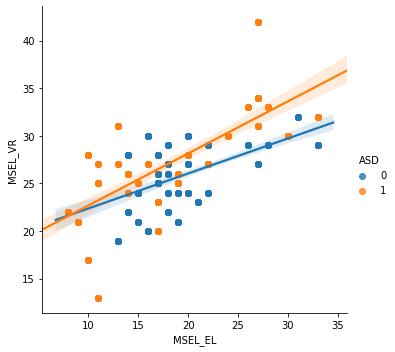

In [99]:
sns.lmplot(x = "MSEL_EL", y = "MSEL_VR", hue="ASD", data = df)

Ordinary least squares multiple regression

In [104]:
md = smf.ols("MSEL_VR ~ MSEL_EL + ASD", data=df)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                MSEL_VR   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     160.1
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           1.47e-51
Time:                        19:44:31   Log-Likelihood:                -1037.6
No. Observations:                 395   AIC:                             2081.
Df Residuals:                     392   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.3546      0.593     27.571      0.0

These are the same kids taking both tests: repeated measures. So... mixed model.

In [105]:
md = smf.mixedlm("MSEL_VR ~ MSEL_EL + ASD", data=df, groups = "ChildID")
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: MSEL_VR  
No. Observations: 395     Method:             REML     
No. Groups:       67      Scale:              0.0000   
Min. group size:  4       Likelihood:         3089.3421
Max. group size:  6       Converged:          Yes      
Mean group size:  5.9                                  
-------------------------------------------------------
            Coef.   Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   16.472     0.593 27.800 0.000 15.311 17.634
MSEL_EL      0.479     0.027 17.491 0.000  0.425  0.533
ASD          2.019     0.343  5.880 0.000  1.346  2.693
ChildID Var  1.904 13028.479                           



Mixed models let us include categorical variables

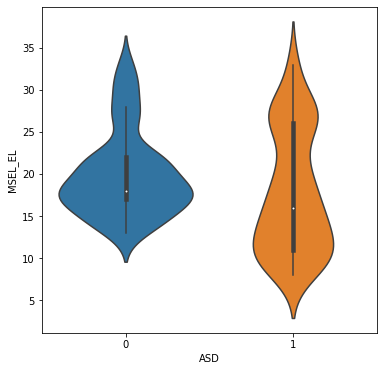

In [92]:
fig = plt.figure(figsize=(6,6))
sns.violinplot(x = "ASD", y = "MSEL_EL", data=df)


Tek et al's (2013) two language acquisition profiles

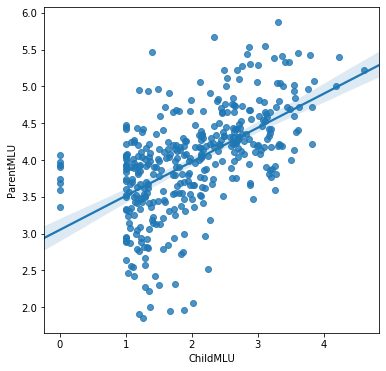

In [93]:
fig= plt.figure(figsize=(6,6))
sns.regplot(x = "ChildMLU", y = "ParentMLU", data = df)

In [94]:
res = stats.pearsonr(df['ChildMLU'], df['ParentMLU'])
print("r (correlation coefficient): ", round(res[0],5))
print("p-value: ", round(res[1],5))

r (correlation coefficient):  0.55614
p-value:  0.0


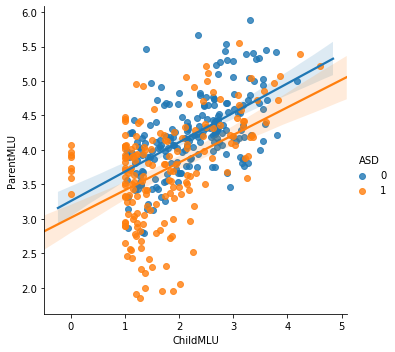

In [95]:
sns.lmplot(x = "ChildMLU", y = "ParentMLU", hue= "ASD", data = df)

## Mixed-Effects Linear Models

Because the same children contributed data several times (6 different visits), we need to take into account the individual variance that each child contributes. This can be done in a Mixed-Effects Linear Model, in which we specify that the children's data should be grouped by their ID number; that is, Child 1 is the same child at visits 1, 2, 3, etc.

In [96]:
data = df
md = smf.mixedlm("ParentMLU ~ ChildMLU + ASD", data, groups = "ChildID")
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ParentMLU
No. Observations: 395     Method:             REML     
No. Groups:       67      Scale:              0.1782   
Min. group size:  4       Likelihood:         -284.5712
Max. group size:  6       Converged:          Yes      
Mean group size:  5.9                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     3.301    0.106 31.132 0.000  3.093  3.509
ChildMLU      0.408    0.034 11.916 0.000  0.341  0.475
ASD          -0.306    0.106 -2.873 0.004 -0.514 -0.097
ChildID Var   0.154    0.084                           



Mixed-effects models let us account for repeated measures

## Adding more control variables

In [98]:
data = df
md = smf.mixedlm("ParentMLU ~ ChildMLU + ASD + Visit + MSEL_EL + MSEL_VR", data, groups = "ChildID")
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ParentMLU
No. Observations: 395     Method:             REML     
No. Groups:       67      Scale:              0.1762   
Min. group size:  4       Likelihood:         -290.9591
Max. group size:  6       Converged:          Yes      
Mean group size:  5.9                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.803    0.318  8.828 0.000  2.181  3.426
ChildMLU      0.346    0.046  7.592 0.000  0.257  0.436
ASD          -0.387    0.112 -3.464 0.001 -0.606 -0.168
Visit         0.034    0.016  2.174 0.030  0.003  0.065
MSEL_EL      -0.011    0.012 -0.921 0.357 -0.034  0.012
MSEL_VR       0.028    0.016  1.805 0.071 -0.002  0.059
ChildID Var   0.151    0.084                           



We can make the model as complex as we like (or at least, as complex as it needs to be)